
Silakan jawab pertanyaan berikut dengan skala 1 (tidak setuju) sampai 5 (sangat setuju):



⚠️ Masukkan angka yang valid.
⚠️ Masukkan angka antara 1 sampai 5.


c:\Users\ODILE FEBRIANTI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Prediksi tipe MBTI kamu adalah: ENTP


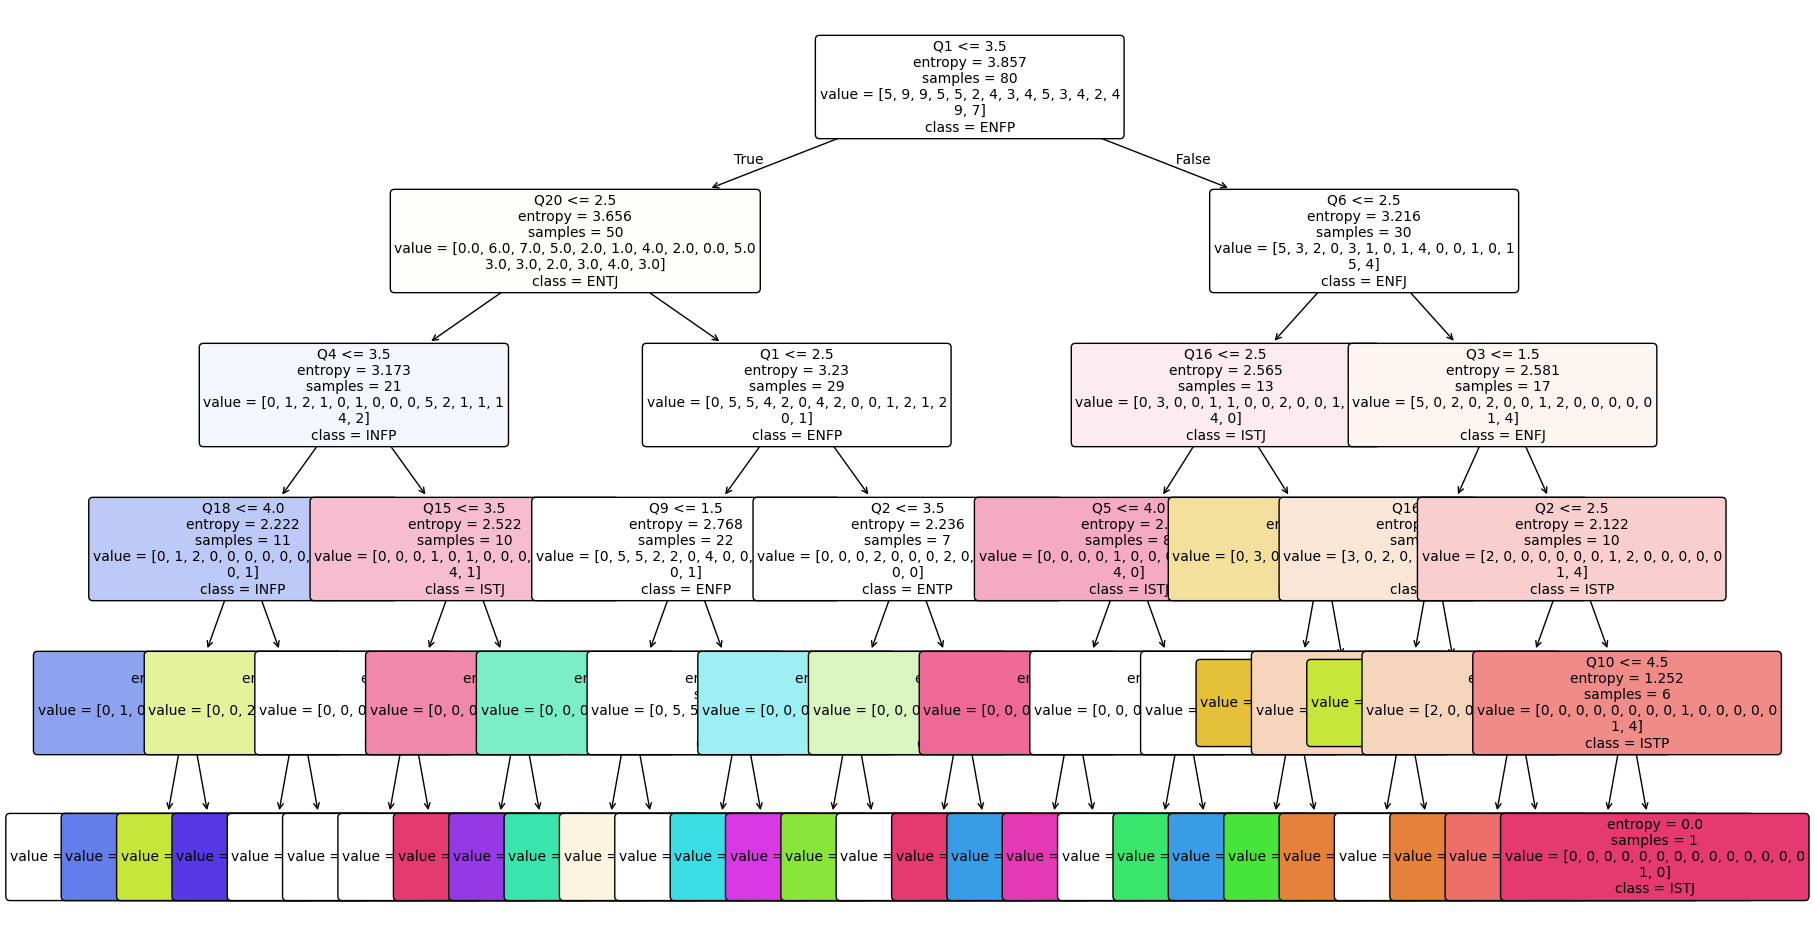

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

# 1. Siapkan data dummy
np.random.seed(42)
random.seed(42)

n_samples = 100
n_questions = 20
X_dummy = np.random.randint(1, 6, size=(n_samples, n_questions))

mbti_types = [
    'INTJ', 'INTP', 'ENTJ', 'ENTP',
    'INFJ', 'INFP', 'ENFJ', 'ENFP',
    'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ',
    'ISTP', 'ISFP', 'ESTP', 'ESFP'
]
y_dummy = [random.choice(mbti_types) for _ in range(n_samples)]

columns = [f'Q{i+1}' for i in range(n_questions)]
df = pd.DataFrame(X_dummy, columns=columns)
df['MBTI'] = y_dummy

# 2. Split data
X = df.drop('MBTI', axis=1)
y = df['MBTI']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Latih decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 4. Pertanyaan MBTI
pertanyaan_mbti = [
    "Saya merasa nyaman bekerja sendiri daripada dalam kelompok.",
    "Saya lebih suka merencanakan sesuatu jauh-jauh hari.",
    "Saya membuat keputusan berdasarkan logika, bukan perasaan.",
    "Saya senang bersosialisasi dan bertemu banyak orang.",
    "Saya sering memikirkan makna tersembunyi dari sesuatu.",
    "Saya merasa energik setelah menghabiskan waktu dengan banyak orang.",
    "Saya cenderung berpikir kritis terhadap sesuatu.",
    "Saya lebih suka hidup yang terstruktur dan rapi.",
    "Saya suka mencoba hal-hal baru tanpa terlalu banyak berpikir.",
    "Saya merasa mudah memahami perasaan orang lain.",
    "Saya lebih suka hal konkret daripada teori abstrak.",
    "Saya lebih sering menyimpan pendapat sendiri.",
    "Saya mengikuti intuisi dalam mengambil keputusan.",
    "Saya merasa terganggu jika rencana berubah tiba-tiba.",
    "Saya terbuka dengan spontanitas dan kejutan.",
    "Saya lebih nyaman dalam situasi yang familiar.",
    "Saya menyukai percakapan yang mendalam daripada basa-basi.",
    "Saya merasa lebih hidup saat berada dalam keramaian.",
    "Saya berpegang pada prinsip dan nilai pribadi.",
    "Saya sering mengamati detail kecil yang terlewat orang lain."
]

# 5. Input jawaban user
jawaban_user = []
print("\nSilakan jawab pertanyaan berikut dengan skala 1 (tidak setuju) sampai 5 (sangat setuju):\n")
for i, pertanyaan in enumerate(pertanyaan_mbti):
    while True:
        try:
            nilai = int(input(f"{i+1}. {pertanyaan}\nJawaban kamu (1-5): "))
            if 1 <= nilai <= 5:
                jawaban_user.append(nilai)
                break
            else:
                print("⚠️ Masukkan angka antara 1 sampai 5.")
        except ValueError:
            print("⚠️ Masukkan angka yang valid.")

# 6. Prediksi tipe MBTI
jawaban_user = [jawaban_user]  # bentuk input ke model harus 2D array
hasil = clf.predict(jawaban_user)[0]
print("\nPrediksi tipe MBTI kamu adalah:", hasil)

# 7. Visualisasi pohon keputusan
plt.figure(figsize=(20,12))
plot_tree(clf,
          feature_names=columns,
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()
